In [1]:
!wget -nc https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-02-03 20:20:47--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.002s  

2023-02-03 20:20:47 (72.4 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 71.5 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [4]:
df1 = pd.read_csv('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', index_col='Date', parse_dates=True)

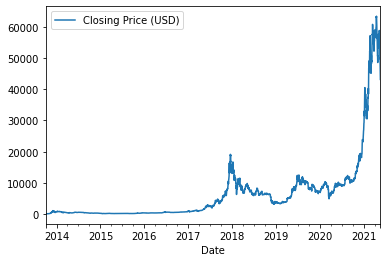

In [5]:
df = df1[['Closing Price (USD)']].copy().dropna()
df.plot();

In [6]:
df['LogClosing Price (USD)'] = np.log(df['Closing Price (USD)'])

In [7]:
Ntest = 100
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [8]:
import pmdarima as pm

In [9]:
model = pm.auto_arima(train['Closing Price (USD)'],
                      error_action='ignore',trace=True,
                      suppress_warnings=True,maxiter=10,
                      seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=inf, Time=2.15 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=40925.118, Time=0.06 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=40278.759, Time=0.40 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=39233.377, Time=0.77 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=inf, Time=0.27 sec
 ARIMA(0,2,1)(1,0,1)[12]             : AIC=39231.725, Time=1.05 sec
 ARIMA(0,2,1)(1,0,0)[12]             : AIC=inf, Time=0.77 sec
 ARIMA(0,2,1)(2,0,1)[12]             : AIC=39220.924, Time=2.06 sec
 ARIMA(0,2,1)(2,0,0)[12]             : AIC=39223.006, Time=1.64 sec
 ARIMA(0,2,1)(2,0,2)[12]             : AIC=39223.092, Time=4.33 sec
 ARIMA(0,2,1)(1,0,2)[12]             : AIC=39221.677, Time=4.79 sec
 ARIMA(0,2,0)(2,0,1)[12]             : AIC=40901.591, Time=2.85 sec
 ARIMA(1,2,1)(2,0,1)[12]             : AIC=39219.471, Time=5.40 sec
 ARIMA(1,2,1)(1,0,1)[12]             : AIC=39231.142, Time=1.04 sec
 ARIMA(1,2,1)(2,0,0)[12

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                 2687
Model:             SARIMAX(0, 2, 2)x(2, 0, [1], 12)   Log Likelihood              -19580.825
Date:                              Fri, 03 Feb 2023   AIC                          39173.650
Time:                                      20:22:54   BIC                          39209.023
Sample:                                  10-01-2013   HQIC                         39186.446
                                       - 02-07-2021                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9664      0.006   -150.340      0.000      -0.979      -0.954
ma.L2         -0.0178      0.006     -2.964      0.003      -0.030      -0.006
ar.S.L12       0.5792      0.098      5.932      0.000       0.388       0.771
ar.S.L24      -0.1111      0.009    -12.144      0.000      -0.129      -0.093
ma.S.L12      -0.5321      0.098     -5.426      0.000      -0.724      -0.340
sigma2      1.399e+05    962.759    145.319      0.000    1.38e+05    1.42e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):            182471.52
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):             361.99   Skew:                            -0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        43.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

Text(0.5, 1.0, 'seasonal model SARIMAX(0, 2, 2)x(2, 0, [1], 12)/ RMSE: 6879.42\t')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


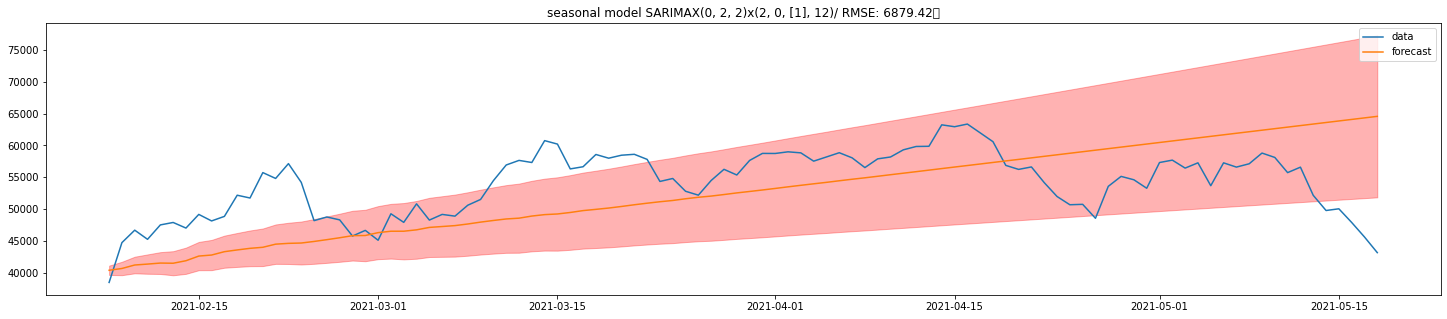

In [12]:
fig, ax = plt.subplots(figsize=(25, 5))
ax.plot(test.index, test['Closing Price (USD)'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();
plt.title("seasonal model SARIMAX(0, 2, 2)x(2, 0, [1], 12)/ RMSE: 6879.42	")

In [13]:
logmodel = pm.auto_arima(train['LogClosing Price (USD)'],
                      error_action='ignore',trace=True,
                      suppress_warnings=True, maxiter=10,
                      seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-9301.780, Time=3.04 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-9309.531, Time=0.21 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-9308.510, Time=1.44 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-9308.722, Time=1.67 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-9304.715, Time=0.12 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=-9309.606, Time=1.13 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=-9311.234, Time=1.89 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=-9309.978, Time=4.14 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-9307.176, Time=1.57 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=-9310.266, Time=4.24 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=-9310.319, Time=4.15 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=-9308.293, Time=3.33 sec
 ARIMA(0,1,0)(2,0,0)[12]             : AIC=-9306.349, Time=0.78 sec

Best model:  ARIMA(0,1,0)(2,0,0)[12] intercept
Total fit time: 27.747 se

In [14]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 2687
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood                4659.617
Date:                            Fri, 03 Feb 2023   AIC                          -9311.234
Time:                                    20:23:22   BIC                          -9287.650
Sample:                                10-01-2013   HQIC                         -9302.703
                                     - 02-07-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0022      0.001      2.551      0.011       0.000       0.004
ar.S.L12       0.0293      0.014      2.061      0.039       0.001       0.057
ar.S.L24      -0.0346      0.017     -1.987      0.047      -0.069      -0.000
sigma2         0.0018   2.36e-05     77.069      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   1.01   Jarque-Bera (JB):              5817.48
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               0.62   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 1.0, 'seasonal logmodel \tSARIMAX(0, 1, 0)x(2, 0, 0, 12) / RMSE: 10000.37')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


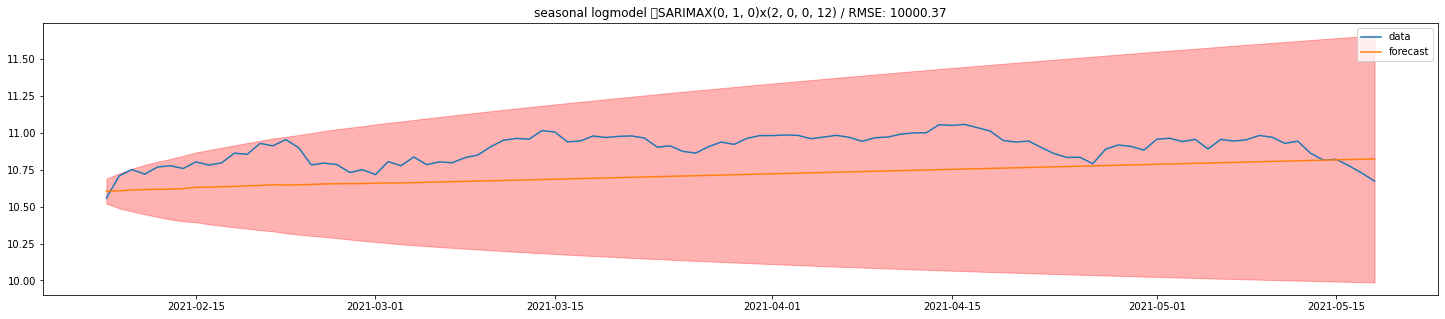

In [15]:
test_pred_log, confint = logmodel.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(25, 5))
ax.plot(test.index, test['LogClosing Price (USD)'], label='data')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();
plt.title("seasonal logmodel 	SARIMAX(0, 1, 0)x(2, 0, 0, 12) / RMSE: 10000.37")

In [16]:
### forecast RMSE
def rmse(t, y):
  return np.sqrt(np.mean((t - y)**2))

In [17]:
print("Non-logged RMSE:", rmse(test['Closing Price (USD)'], test_pred))
print("Logged RMSE:", rmse(test['Closing Price (USD)'], np.exp(test_pred_log)))

Non-logged RMSE: 6879.4252853494245
Logged RMSE: 10000.379092540235


In [18]:
### non-seasonal
model = pm.auto_arima(train['LogClosing Price (USD)'],
                      error_action='ignore',trace=True,
                      suppress_warnings=True, maxiter=10,
                      d=0,
                      max_p=12, max_q=2, max_order=14,
                      stepwise=False,
                      seasonal=False)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=18597.804, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=11394.219, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=7619.163, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=7787.556, Time=0.29 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=7549.782, Time=0.41 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=7025.462, Time=0.29 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=6938.710, Time=0.35 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=7028.102, Time=0.46 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=6767.795, Time=0.37 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=5605.795, Time=0.49 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=6507.134, Time=0.56 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=6572.955, Time=0.50 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=5597.340, Time=0.53 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=6317.240, Time=0.67 sec
 ARIMA(5,0,0)

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2687
Model:              SARIMAX(12, 0, 2)   Log Likelihood               -2212.477
Date:                Fri, 03 Feb 2023   AIC                           4454.953
Time:                        20:23:58   BIC                           4543.396
Sample:                    10-01-2013   HQIC                          4486.945
                         - 02-07-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6491     10.425     -0.062      0.950     -21.081      19.783
ar.L2         -0.6358      4.269     -0.149      0.882      -9.004       7.732
ar.L3         -0.5184      3.018     -0.172      0.864      -6.434       5.397
ar.L4         -0.3140      3.524     -0.089      0.929      -7.222       6.594
ar.L5         -0.0563      1.606     -0.035      0.972      -3.205       3.092
ar.L6          0.2082      1.344      0.155      0.877      -2.427       2.843
ar.L7          0.4319      2.262      0.191      0.849      -4.001       4.865
ar.L8          0.5772      3.372      0.171      0.864      -6.032       7.187
ar.L9          0.6246      3.400      0.184      0.854      -6.040       7.289
ar.L10         0.5761      3.357      0.172      0.864      -6.004       7.156
ar.L11         0.4526      2.726      0.166      0.868      -4.890       5.795
ar.L12         0.2896      2.361      0.123      0.902      -4.339       4.918
ma.L1          0.6125     10.427      0.059      0.953     -19.824      21.049
ma.L2          0.3256      4.079      0.080      0.936      -7.669       8.320
sigma2         0.7844      0.033     23.676      0.000       0.719       0.849
===================================================================================
Ljung-Box (L1) (Q):                2329.20   Jarque-Bera (JB):              3690.84
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 1.0, 'non seasonal logmodel SARIMAX(12, 0, 2) /RMSE 28874.73')

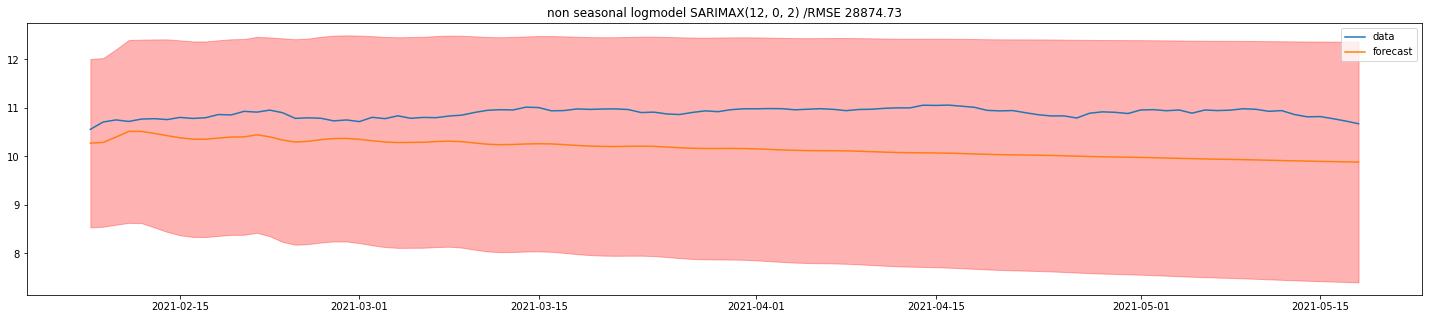

In [20]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(25, 5))
ax.plot(test.index, test['LogClosing Price (USD)'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();
plt.title("non seasonal logmodel SARIMAX(12, 0, 2) /RMSE 28874.73")

In [21]:
rmse(test['Closing Price (USD)'], np.exp(test_pred))

28874.73755728777

In [22]:
### non-seasonal non-logged
model = pm.auto_arima(train['Closing Price (USD)'],
                       error_action='ignore',trace=True,
                      suppress_warnings=True, maxiter=10,
                      max_p=12, max_q=2, max_order=14,
                      stepwise=False,
                      seasonal=False)

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=40927.108, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=40284.757, Time=0.15 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=39237.709, Time=1.23 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=39204.061, Time=2.17 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=39969.684, Time=0.77 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=39259.897, Time=0.89 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.28 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=39742.460, Time=0.44 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=39260.330, Time=0.96 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=39210.986, Time=1.20 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=39612.571, Time=0.58 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=39249.685, Time=1.19 sec
 ARIMA(4,2,2)(0,0,0)[0] intercept   : AIC=39208.395, Time=1.32 sec
 ARIMA(5,2,0)

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2687
Model:               SARIMAX(7, 2, 2)   Log Likelihood              -19585.547
Date:                Fri, 03 Feb 2023   AIC                          39193.094
Time:                        20:25:12   BIC                          39257.944
Sample:                    10-01-2013   HQIC                         39216.552
                         - 02-07-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.8253      0.428      4.262      0.000       0.986       2.665
ar.L1         -0.6112      0.079     -7.702      0.000      -0.767      -0.456
ar.L2         -0.0583      0.008     -7.160      0.000      -0.074      -0.042
ar.L3         -0.0726      0.010     -7.083      0.000      -0.093      -0.052
ar.L4         -0.0083      0.009     -0.891      0.373      -0.027       0.010
ar.L5          0.0069      0.010      0.684      0.494      -0.013       0.027
ar.L6          0.0906      0.010      8.847      0.000       0.071       0.111
ar.L7          0.0029      0.015      0.194      0.846      -0.026       0.032
ma.L1         -0.3436      0.078     -4.394      0.000      -0.497      -0.190
ma.L2         -0.6056      0.077     -7.855      0.000      -0.757      -0.454
sigma2      1.367e+05    996.813    137.119      0.000    1.35e+05    1.39e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            211443.21
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):             129.62   Skew:                            -1.28
Prob(H) (two-sided):                  0.00   Kurtosis:                        46.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 1.0, 'non seasonal model SARIMAX(7, 2, 2)/RMSE-12972.85\t')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


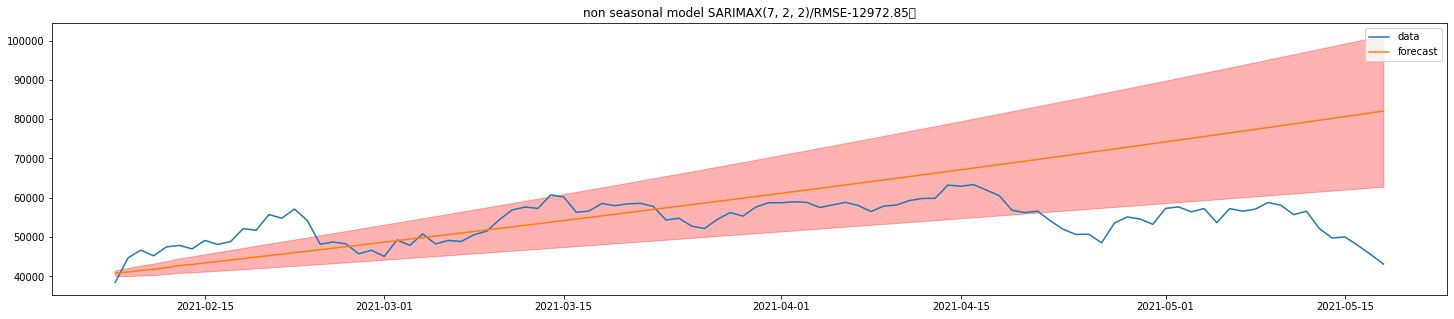

In [24]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(25, 5))
ax.plot(test.index, test['Closing Price (USD)'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();
plt.title("non seasonal model SARIMAX(7, 2, 2)/RMSE-12972.85	")

In [25]:
rmse(test['Closing Price (USD)'], test_pred)

12972.851055953703